In [ ]:
print("Har Har Mahadev")

Har Har Mahadev


In [ ]:
!nvidia-smi

Fri Jan 19 06:14:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 158MB/s]
2024-01-19 06:24:22.872533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 06:24:22.872590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 06:24:22.874592: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 06:24:24.220496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [0

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

/content


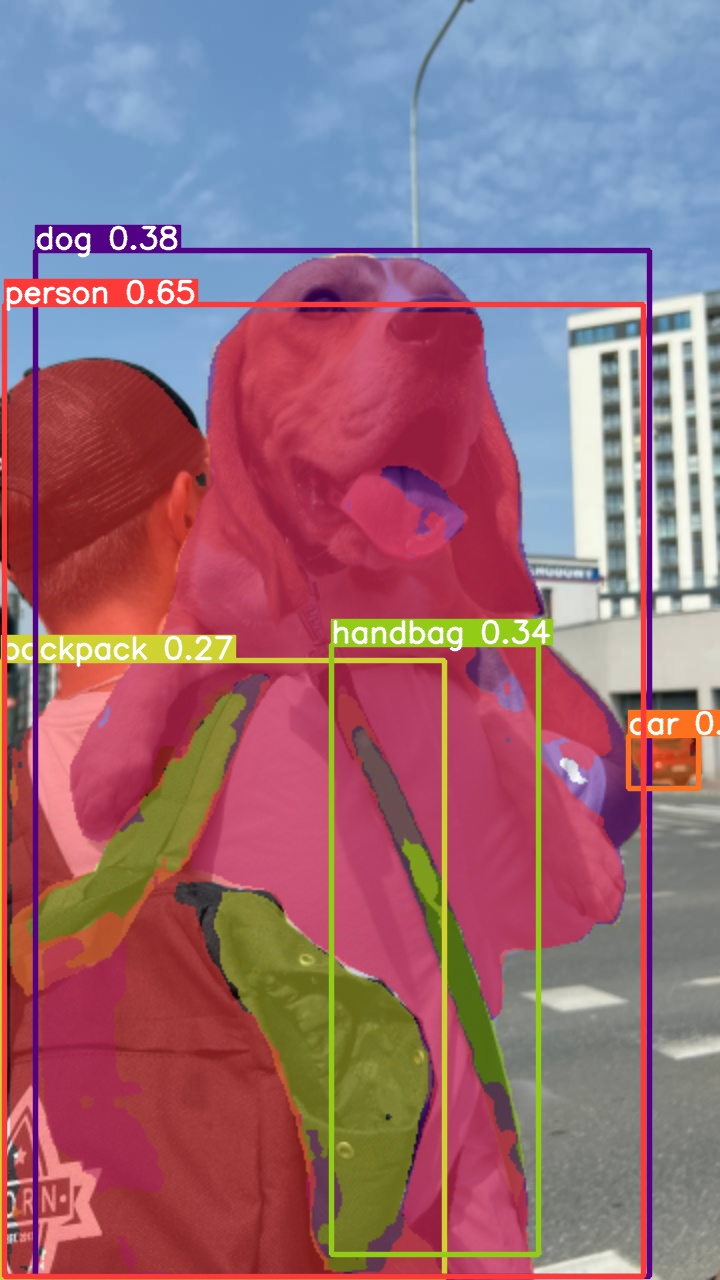

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ROOT_PATH = "/content/drive/MyDrive/YOLO_CELL_SEG"

In [ ]:
!pwd

/content/drive/MyDrive/YOLO_CELL_SEG/CellData


In [ ]:
%cd "/content/drive/MyDrive/YOLO_CELL_SEG"

/content/drive/MyDrive/YOLO_CELL_SEG


In [ ]:
!pwd

/content/drive/MyDrive/YOLO_CELL_SEG


In [ ]:
!ls

CellData  CellSegmentation.ipynb  data.yaml


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=100 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 149MB/s] 
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simp

In [28]:
!ls runs/segment/train/

args.yaml					    MaskP_curve.png	 train_batch1262.jpg
BoxF1_curve.png					    MaskPR_curve.png	 train_batch1.jpg
BoxP_curve.png					    MaskR_curve.png	 train_batch2.jpg
BoxPR_curve.png					    results.csv		 val_batch0_labels.jpg
BoxR_curve.png					    results.png		 val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	 val_batch1_labels.jpg
events.out.tfevents.1705646429.5fbcf079ba8b.7670.0  train_batch1260.jpg  val_batch1_pred.jpg
MaskF1_curve.png				    train_batch1261.jpg  weights


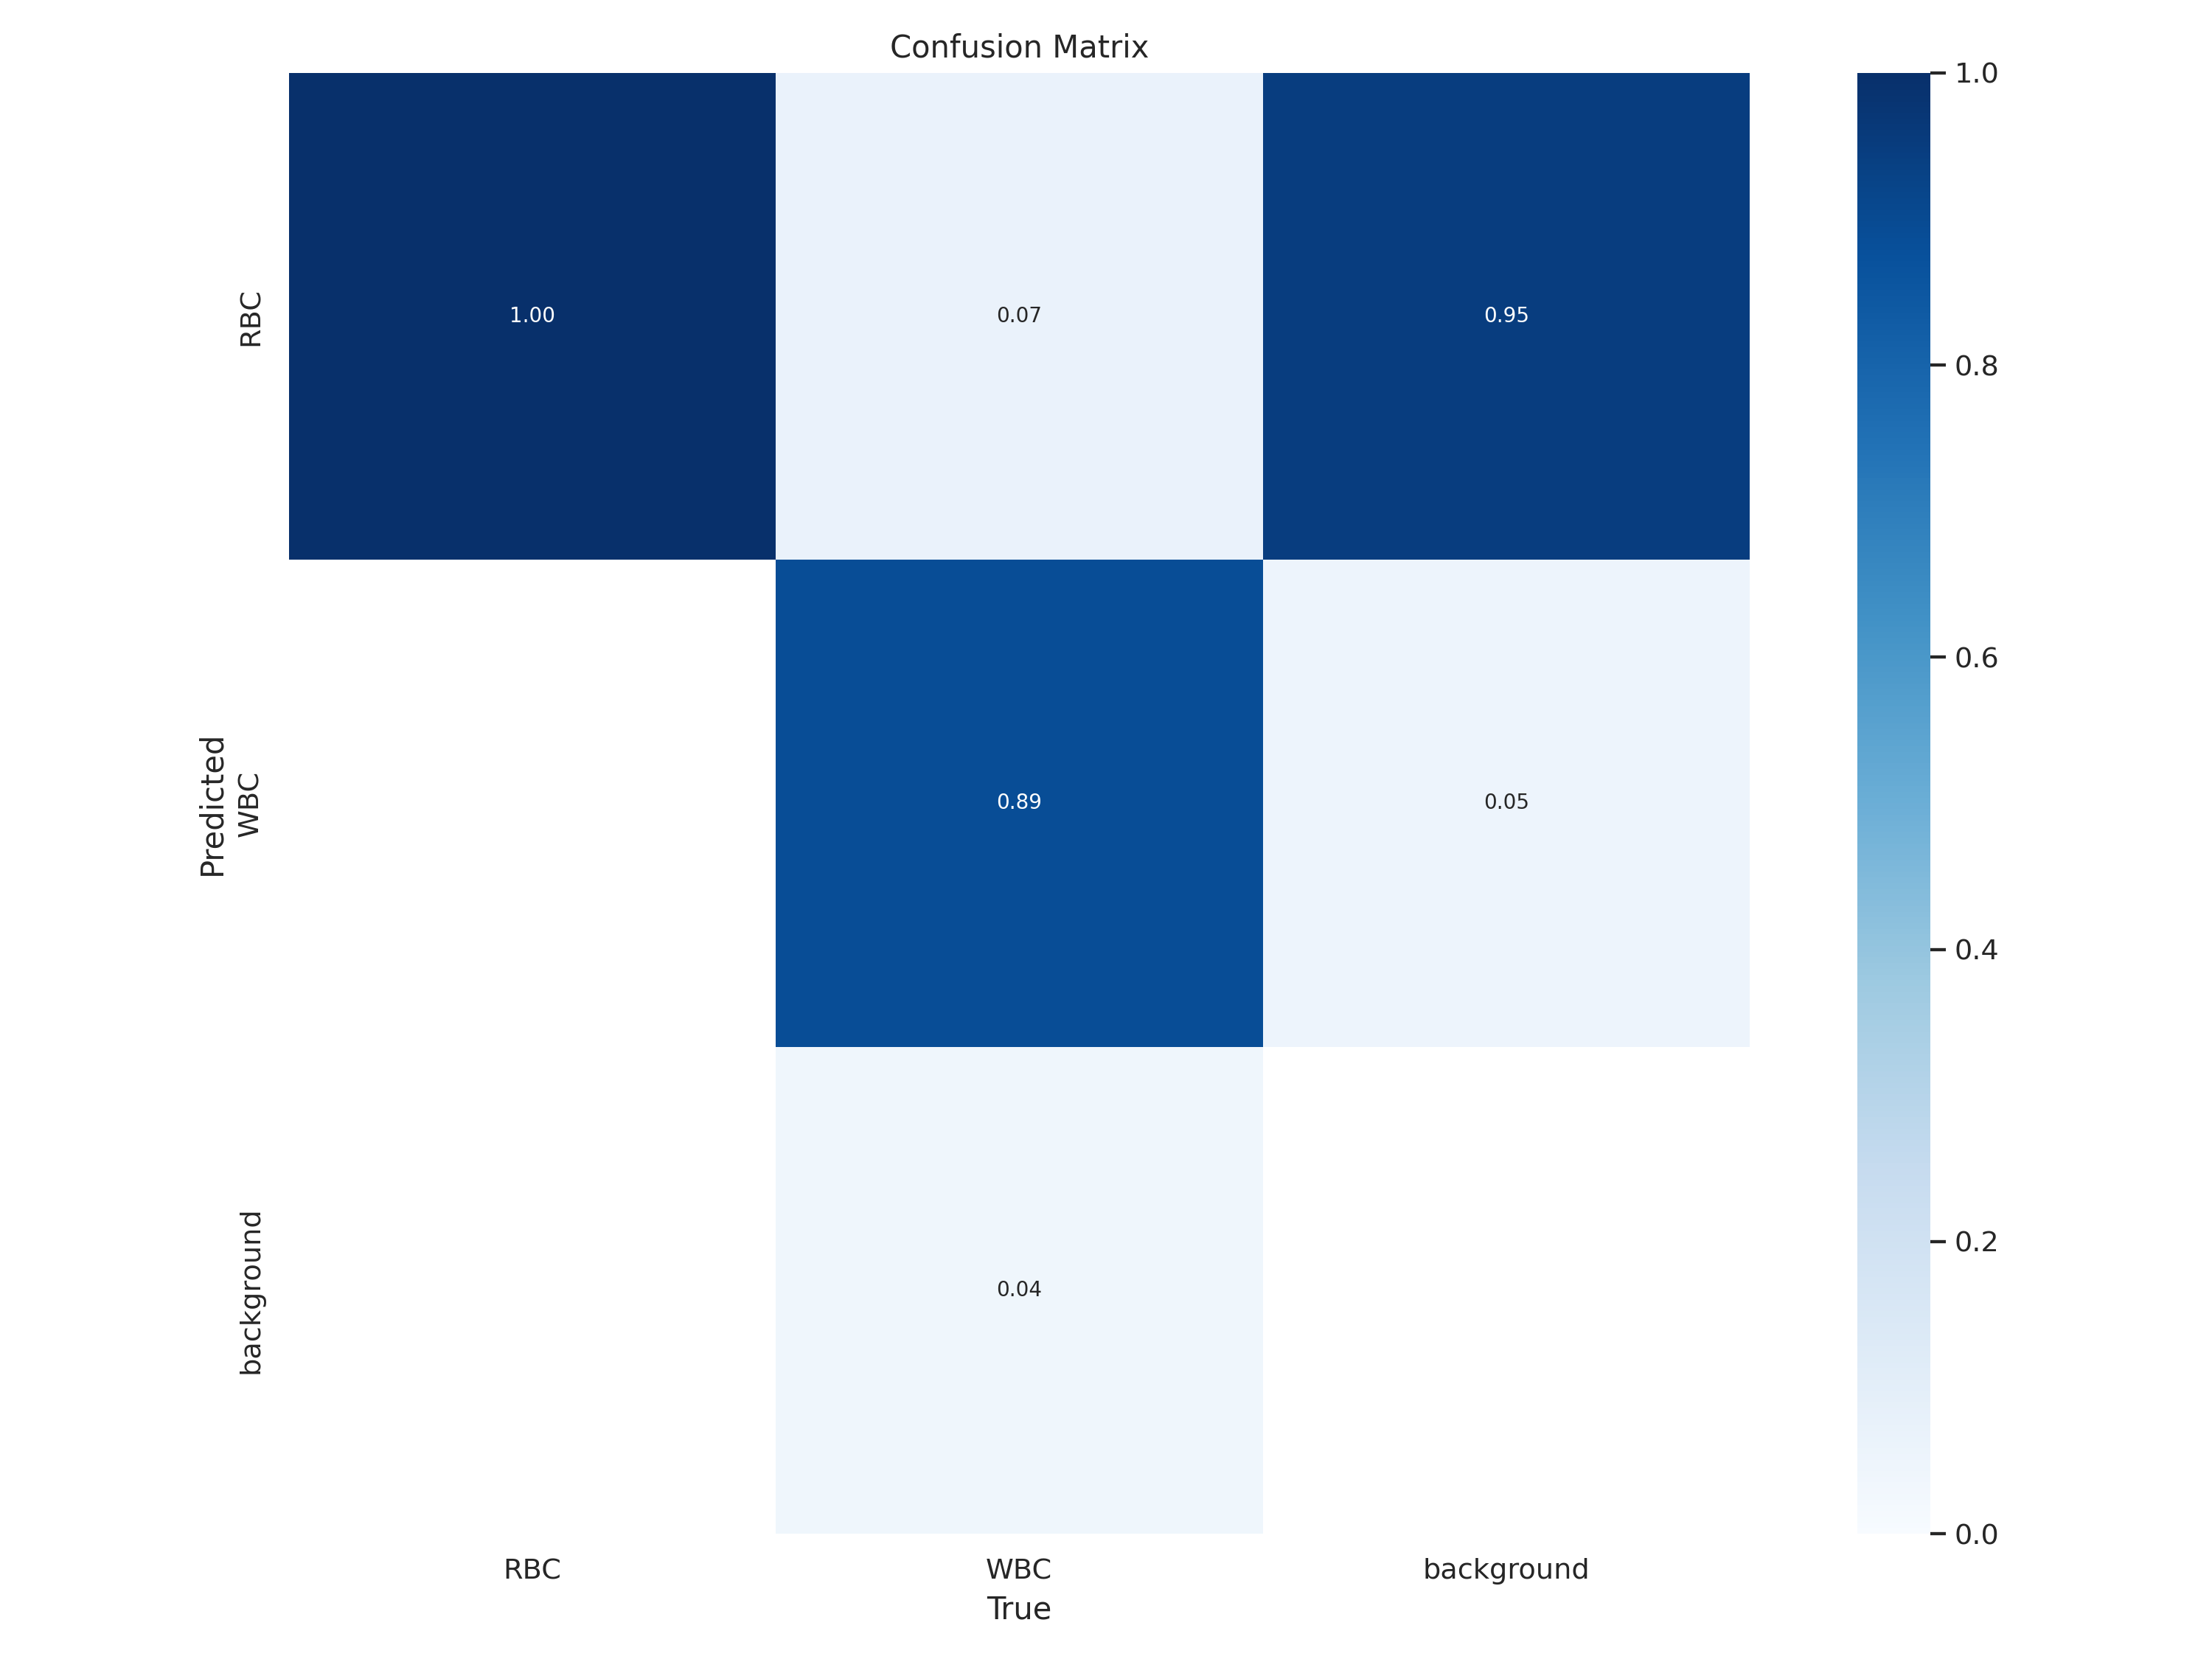

In [29]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

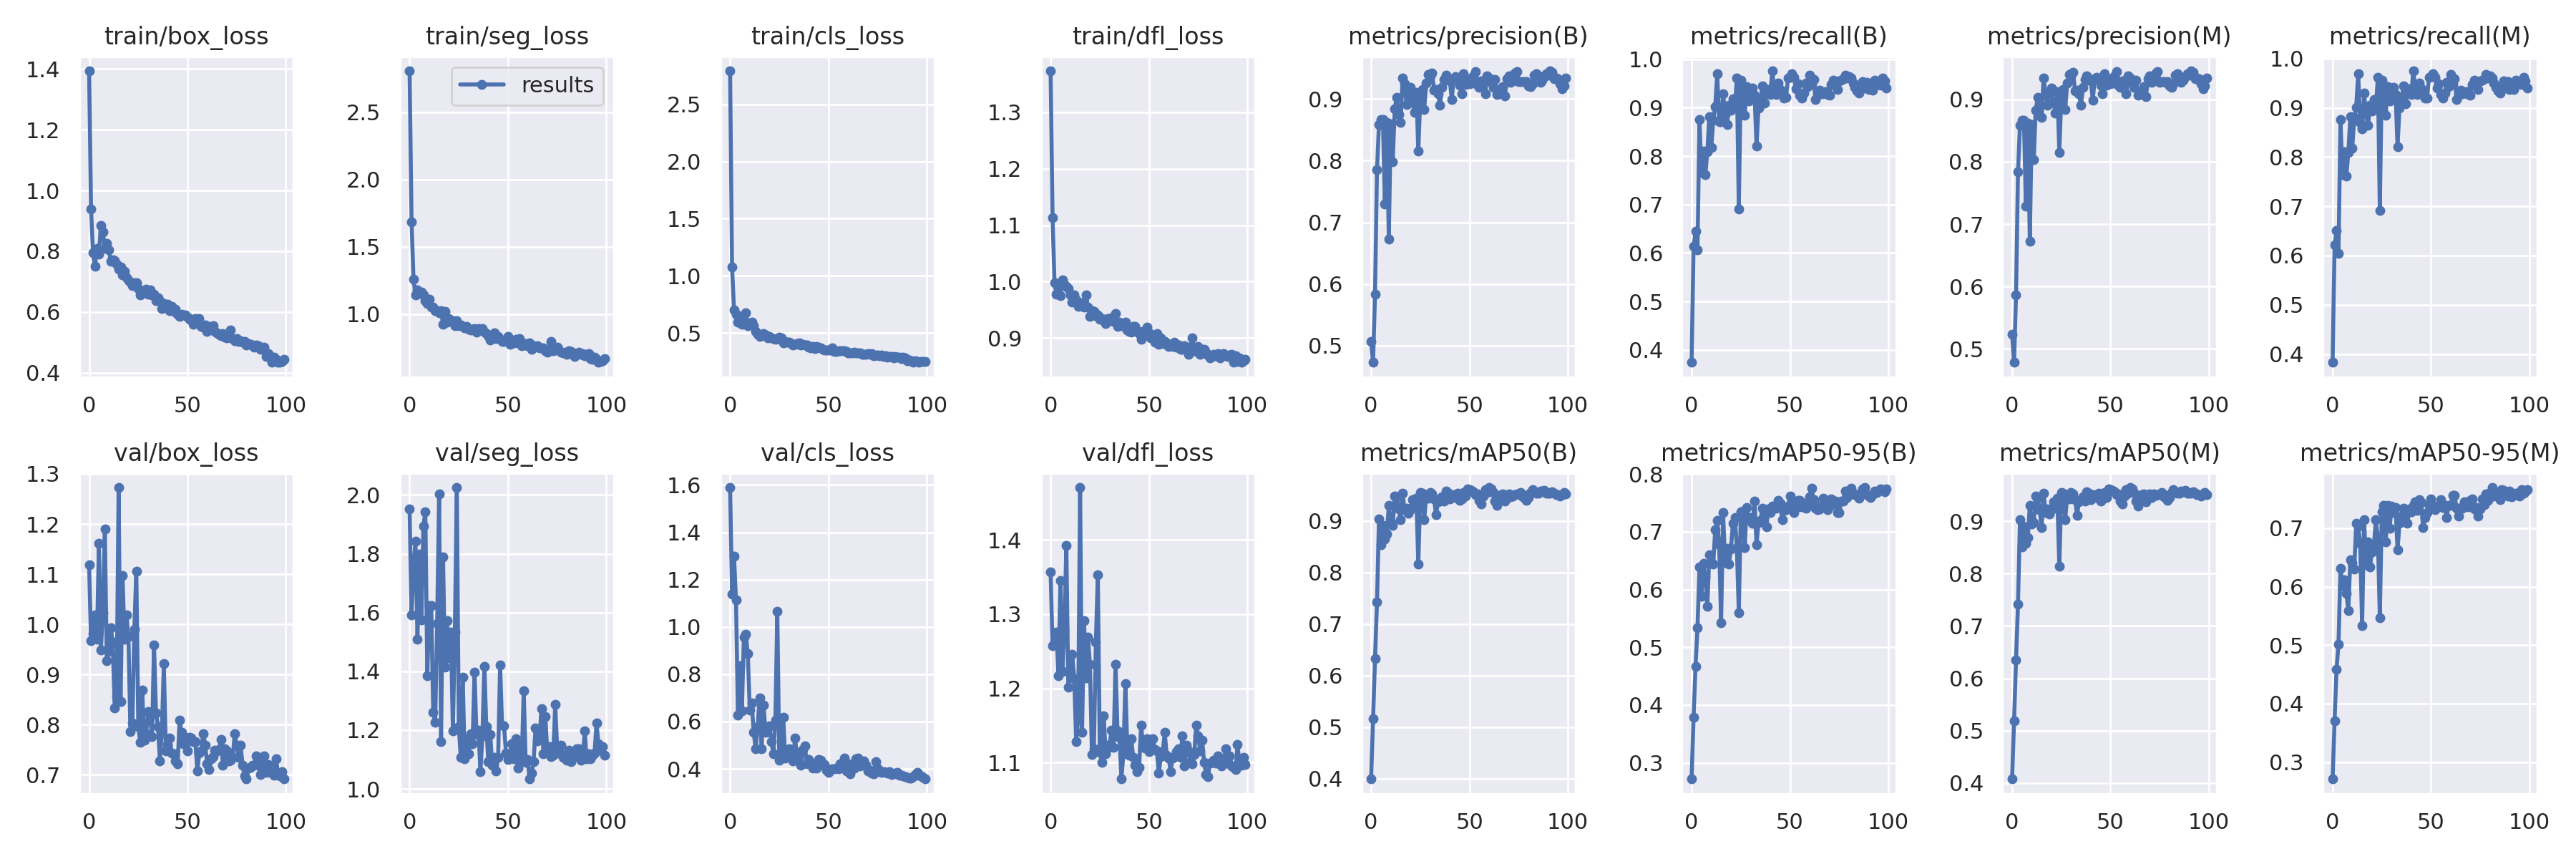

In [30]:
Image(filename=f'runs/segment/train/results.png', width=600)

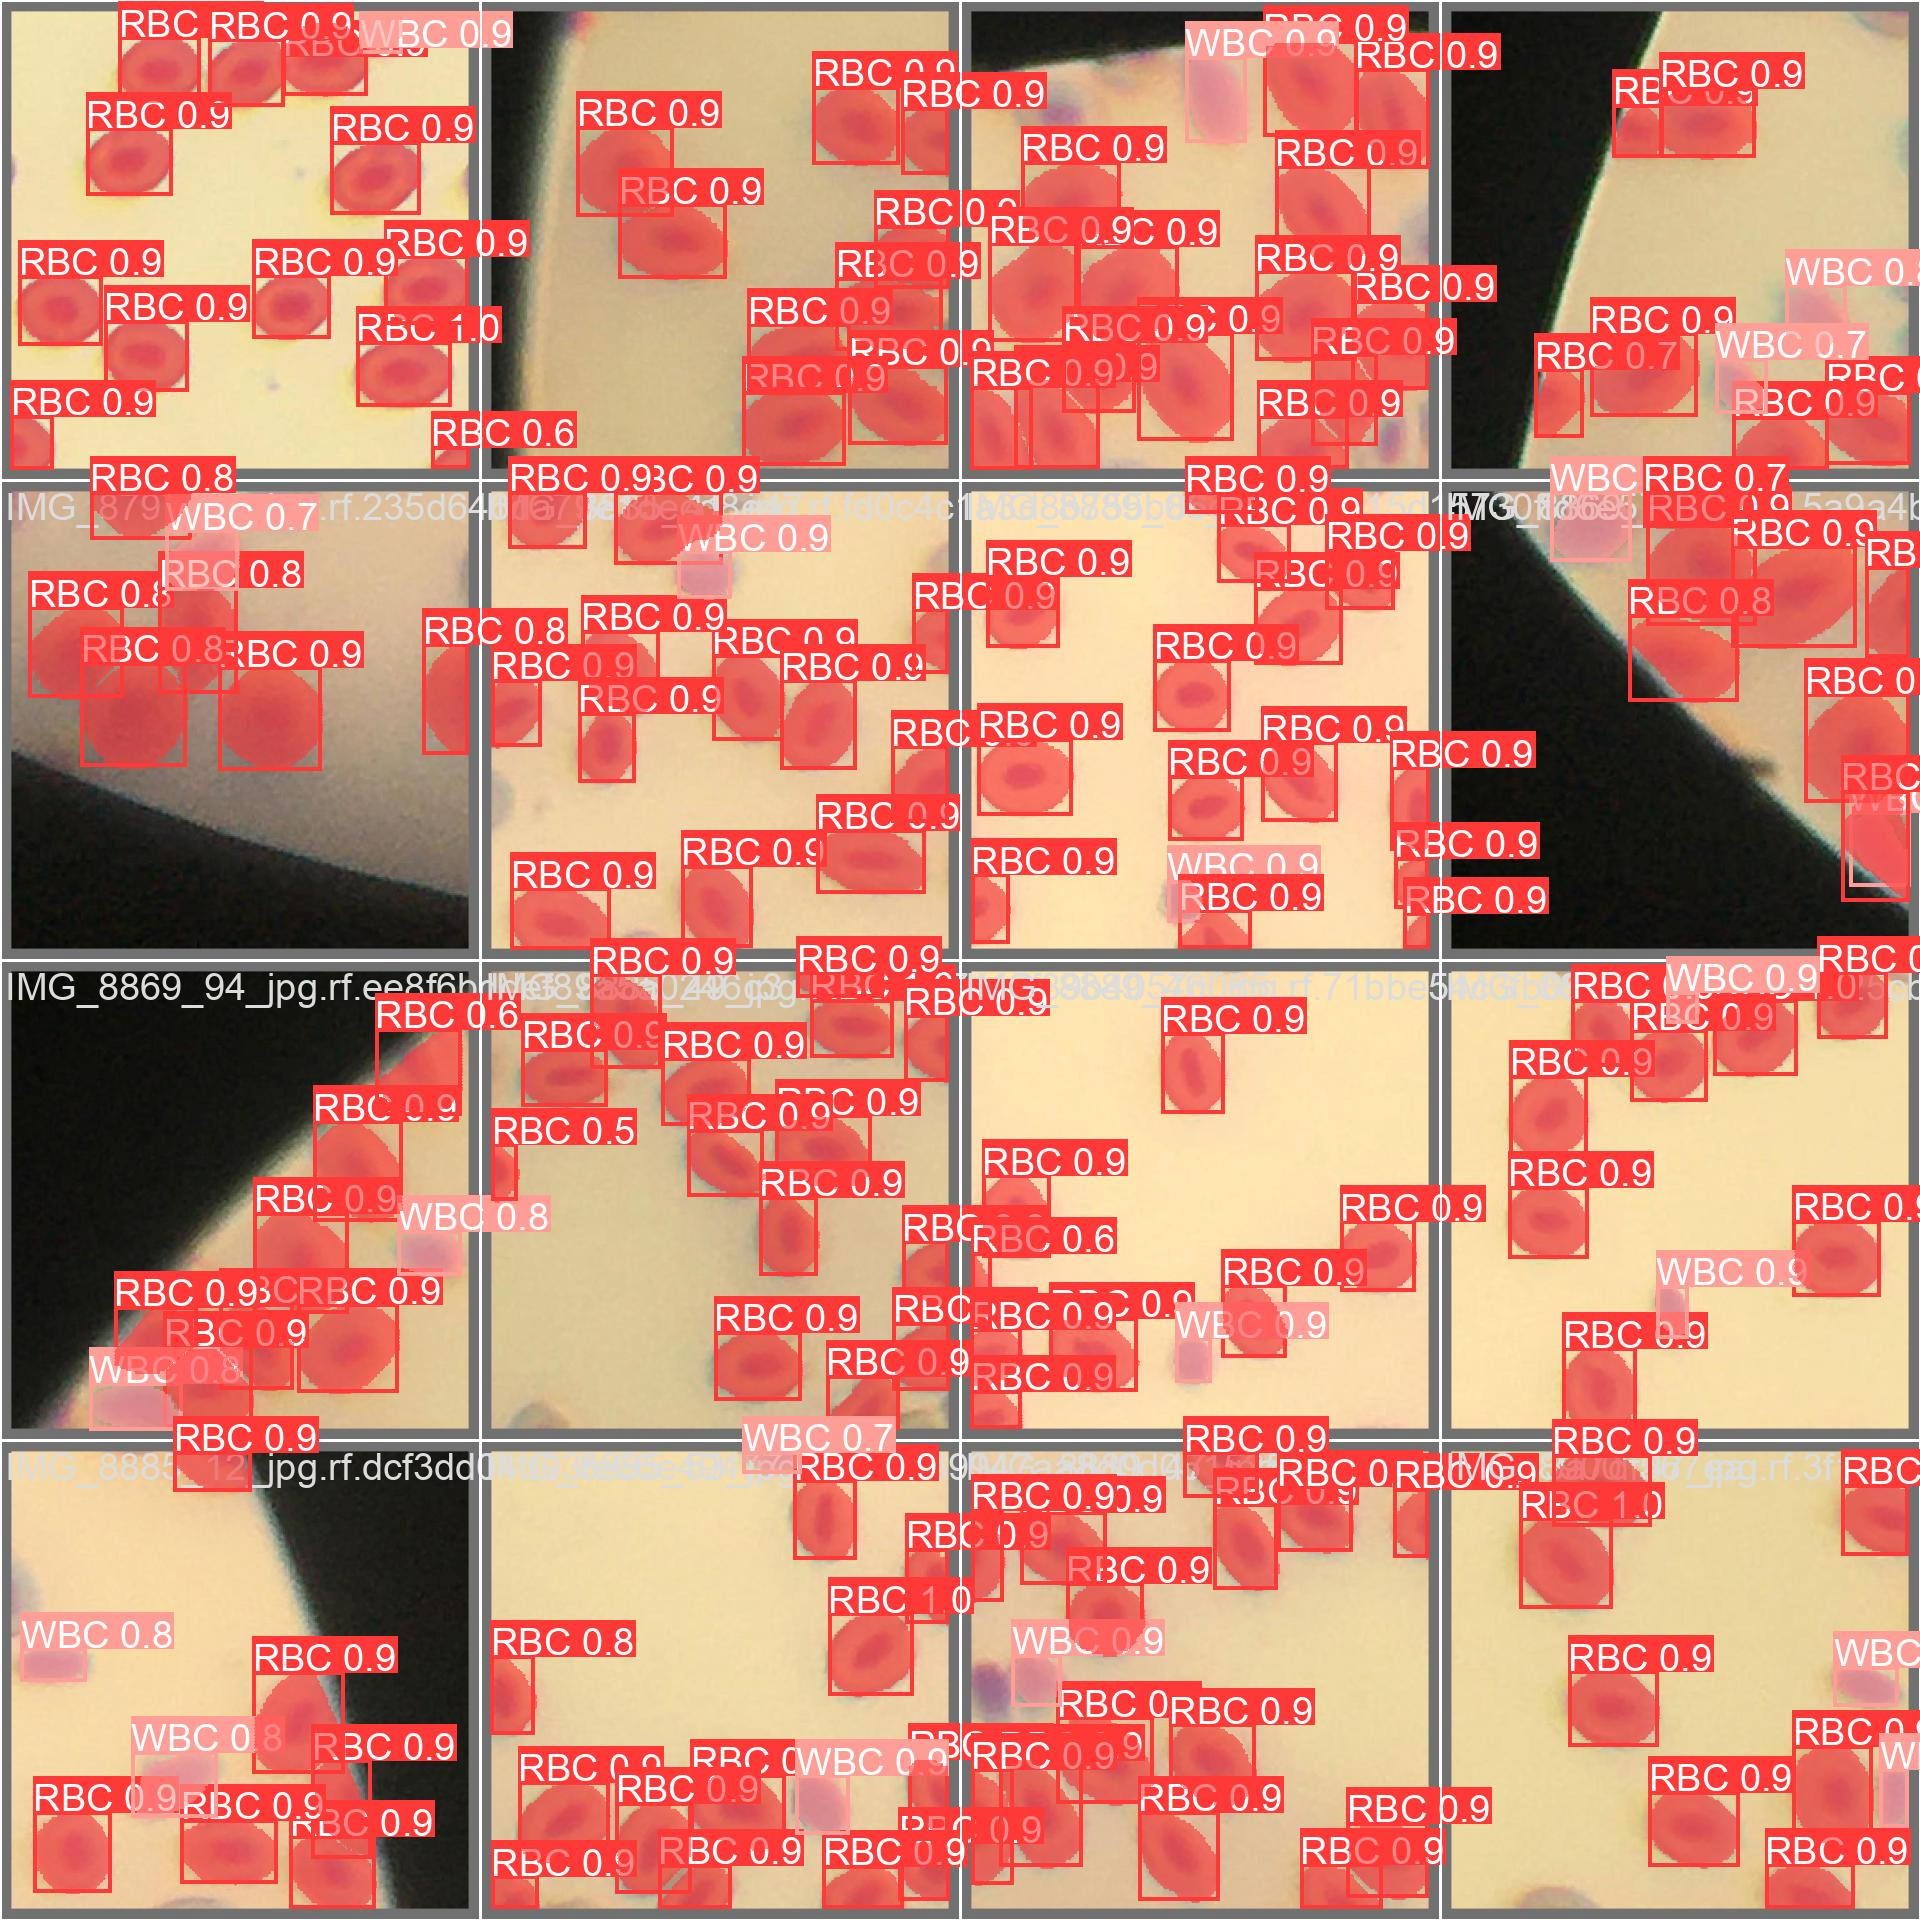

In [31]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [32]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

2024-01-19 07:50:19.219659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 07:50:19.219712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 07:50:19.221173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 07:50:20.296722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO_CELL_SEG/CellData/valid/l

In [35]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.5 source=/content/drive/MyDrive/YOLO_CELL_SEG/CellData/test/images save=true

2024-01-19 07:54:45.251856: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 07:54:45.251903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 07:54:45.253356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 07:54:46.308936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/70 /content/driv

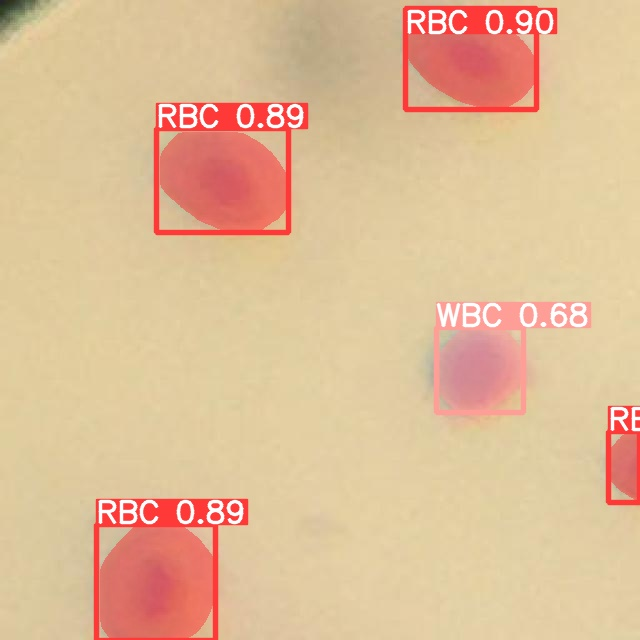

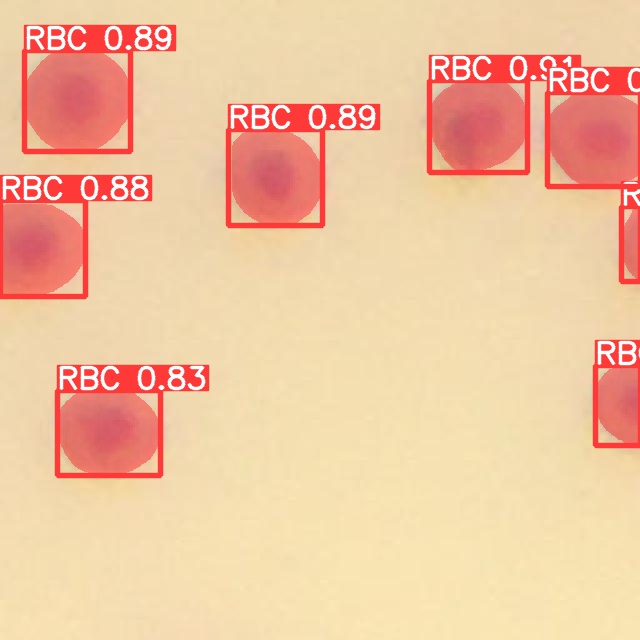

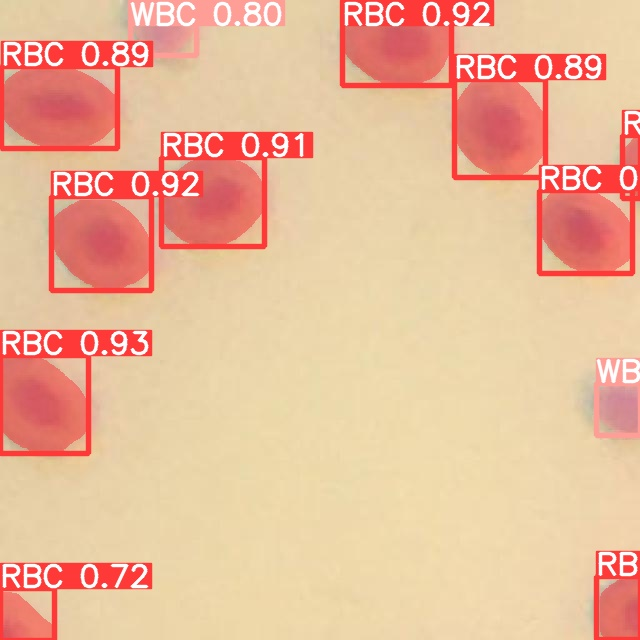

In [36]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")